# Data Visualization

This notebook is meant for data visualization and (potential) preprocessing before using the data for model training. Our data is stored on XetHub, and we will use the Python SDK they provide to access our data without the need for local copies. 

First, installation of `pyxet` and other dependencies:

In [1]:
%pip install pyxet
%pip install polars
%pip install pandas
%pip install numpy
%pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyxet         # make xet:// protocol available   
import pandas as pd 
import polars as pl  # faster alternative to pandas
import numpy as np
import pyarrow
import matplotlib.pyplot as plt

fs = pyxet.XetFS()

# Drug Review Dataset (UCI)

In [3]:
# get the drug training and testing data
df_drugs_train = pl.read_csv('xet://alt2177/mllm-data/main/data/drug_data/drugsComTrain_raw.tsv', separator = '\t')
df_drugs_test = pl.read_csv('xet://alt2177/mllm-data/main/data/drug_data/drugsComTest_raw.tsv', separator = '\t')
print(df_drugs_train.shape)
print(df_drugs_test.shape)
df_drugs_train.head(10)

(161297, 7)
(53766, 7)


,drugName,condition,review,rating,date,usefulCount
i64,str,str,str,f64,str,i64
206461,"""Valsartan""","""Left Ventricul…","""""It has no sid…",9.0,"""May 20, 2012""",27
95260,"""Guanfacine""","""ADHD""","""""My son is hal…",8.0,"""April 27, 2010…",192
92703,"""Lybrel""","""Birth Control""","""""I used to tak…",5.0,"""December 14, 2…",17
138000,"""Ortho Evra""","""Birth Control""","""""This is my fi…",8.0,"""November 3, 20…",10
35696,"""Buprenorphine …","""Opiate Depende…","""""Suboxone has …",9.0,"""November 27, 2…",37
155963,"""Cialis""","""Benign Prostat…","""""2nd day on 5m…",2.0,"""November 28, 2…",43
165907,"""Levonorgestrel…","""Emergency Cont…","""""He pulled out…",1.0,"""March 7, 2017""",5
102654,"""Aripiprazole""","""Bipolar Disord…","""""Abilify chang…",10.0,"""March 14, 2015…",32
74811,"""Keppra""","""Epilepsy""",""""" I Ve had no…",1.0,"""August 9, 2016…",11


In [4]:
df_drugs_train["review"][0]

'"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'

## Data Description / Visualization

### Training Data

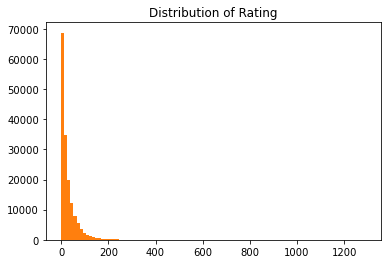

In [5]:
# Looking at the individual columns:
# df_drugs_train.dtypes  #= [Int64, String, String, String, Float64, String, Int64]
df_drugs_train.describe()
df_drugs_train.select(pl.all().is_null().sum())

#df_drugs_train.select(['rating']).unique()
# for cond in df_drugs_train.select(['condition']).unique()['condition']:
#     print(cond)
# for drug in df_drugs_train.select(['drugName']).unique()['drugName']:
#     print(drug)
# for rev in df_drugs_train.select(['review']).unique()['review'][0:20]:
#     print(rev)

review_word_count = df_drugs_train.select(['review']).map_rows(lambda t: len(t[0].split(" ")))
#plt.hist(review_word_count)
review_word_count.describe()
plt.hist(df_drugs_train['rating'], bins = 10)
plt.title("Distribution of Rating")
#plt.savefig("rating_dist")
plt.hist(df_drugs_train['usefulCount'], bins = 100)
plt.show()
#df_drugs_train.select(['usefulCount']).unique()


In [44]:
# Look at the review column in more depth to see the range of the word count
print(np.quantile(review_word_count, 0.95)) # 147
print(np.quantile(review_word_count, 0.05)) # 14 words

# plt.hist(review_word_count, bins = 200)
# plt.xlim(14, 200)
# plt.show()
# for rev in df_drugs_train.filter(review_word_count['map'] < 5)['review']:
#    print(rev.strip('\n'))

# for rev in df_drugs_train.filter(review_word_count['map'] > 1000)['review']:
#    print(rev.strip('\n'))


#    print()
#review_word_count
#df_drugs_train.filter(review_word_count['map'] > 1000)['review']
#df_drugs_train.filter(review_word_count['map'] < 5)['review']



147.0
14.0


There are 5 reviews over 1000 words and two of them look identical. There might be more duplicates in the review column.

Getting the basic descriptive stats, data types, etc.

In [33]:
# Get descripive stats
df_drugs_train.describe()

describe,,drugName,condition,review,rating,date,usefulCount
str,f64,str,str,str,f64,str,f64
"""count""",161297.0,"""161297""","""161297""","""161297""",161297.0,"""161297""",161297.0
"""null_count""",0.0,"""0""","""899""","""0""",0.0,"""0""",0.0
"""mean""",115923.585305,null,null,null,6.994377,null,28.004755
"""std""",67004.44517,null,null,null,3.272329,null,36.403742
"""min""",2.0,"""A + D Cracked …","""0</span> users…",""""" please t…",1.0,"""April 1, 2008""",0.0
"""25%""",58063.0,null,null,null,5.0,null,6.0
"""50%""",115744.0,null,null,null,8.0,null,16.0
"""75%""",173776.0,null,null,null,10.0,null,36.0
"""max""",232291.0,"""femhrt""","""zen Shoulde""","""""❤️❤️❤️ Cialis…",10.0,"""September 9, 2…",1291.0


In [34]:
# get column names and their dtypes
df_drugs_train.schema

OrderedDict([('', Int64),
             ('drugName', Utf8),
             ('condition', Utf8),
             ('review', Utf8),
             ('rating', Float64),
             ('date', Utf8),
             ('usefulCount', Int64)])

In [25]:
# check if all the rows are unique 
print(df_drugs_train.is_unique().all())

True


In [35]:
# check for nulls
df_drugs_train.null_count()

,drugName,condition,review,rating,date,usefulCount
u32,u32,u32,u32,u32,u32,u32
0,0,899,0,0,0,0


Since there are over 800 `null` values in `condition`, let's take a closer look. This column represents the medical conditions of respondents, so we cannot just drop those. Instead, we fill with `not_reported`. This ensures no null values.

In [51]:
# fill missing values with "not_reported"
df_filled = df_drugs_train.with_columns(
    pl.col("condition").fill_null(pl.lit("not_reported")),
)

# check if we no longer have null values
print(df_filled.null_count())

shape: (1, 7)
┌─────┬──────────┬───────────┬────────┬────────┬──────┬─────────────┐
│     ┆ drugName ┆ condition ┆ review ┆ rating ┆ date ┆ usefulCount │
│ --- ┆ ---      ┆ ---       ┆ ---    ┆ ---    ┆ ---  ┆ ---         │
│ u32 ┆ u32      ┆ u32       ┆ u32    ┆ u32    ┆ u32  ┆ u32         │
╞═════╪══════════╪═══════════╪════════╪════════╪══════╪═════════════╡
│ 0   ┆ 0        ┆ 0         ┆ 0      ┆ 0      ┆ 0    ┆ 0           │
└─────┴──────────┴───────────┴────────┴────────┴──────┴─────────────┘


### Testing Data

# XSUM Dataset

In [4]:
df_xsum = pl.from_pandas(pd.read_parquet('xet://alt2177/mllm-data/main/data/xsum/predictions.parquet'))
print(df_xsum.shape)
df_xsum.head()

(11334, 3)


text,target,evaluation_predictions
str,str,list[i64]
"""Amina Al-Jeffe…","""A woman who cl…","[0, 202, … 0]"
"""The concerns c…","""JogScotland's …","[0, 139, … 0]"
"""Backbench MPs …","""Before Jeremy …","[0, 9083, … 0]"
"""The company sa…","""Boeing has sho…","[0, 23241, … 0]"
"""The vote held …","""The run-off pa…","[0, 139, … 0]"


# CNN/Dailymail Dataset

In [5]:
files_cnn = fs.ls('xet://alt2177/mllm-data/main/data/cnn_dailymail/1.0.0')
df_dir = pl.from_dicts(files_cnn)
print("==================== Current Working Dir ls =====================")
print(df_dir.head())
# print(df_dir.select(["name"]).head(1).item())
df_cnn = pl.from_pandas(pd.read_parquet('xet://{}'.format(df_dir.select(["name"]).head(1).item())))
# df_cnn = pl.from_pandas(pd.read_parquet('xet://alt2177/mllm-data/main/data/cnn_dailymail/1.0.0/test-00000-of-00001.parquet'))
print(df_cnn.shape)
df_cnn.head()

==================== Current Working Dir ls =====================
shape: (5, 3)
┌───────────────────────────────────┬───────────┬──────┐
│ name                              ┆ size      ┆ type │
│ ---                               ┆ ---       ┆ ---  │
│ str                               ┆ i64       ┆ str  │
╞═══════════════════════════════════╪═══════════╪══════╡
│ alt2177/mllm-data/main/data/cnn_… ┆ 29994057  ┆ file │
│ alt2177/mllm-data/main/data/cnn_… ┆ 256494215 ┆ file │
│ alt2177/mllm-data/main/data/cnn_… ┆ 256538980 ┆ file │
│ alt2177/mllm-data/main/data/cnn_… ┆ 259242781 ┆ file │
│ alt2177/mllm-data/main/data/cnn_… ┆ 34657215  ┆ file │
└───────────────────────────────────┴───────────┴──────┘
(11490, 3)


article,highlights,id
str,str,str
"""(CNN)The Pales…","""Membership giv…","""f001ec5c470493…"
"""(CNN)Never min…","""Theia, a bully…","""230c522854991d…"
"""(CNN)If you've…","""Mohammad Javad…","""4495ba8f3a340d…"
"""(CNN)Five Amer…","""17 Americans w…","""a38e72fed88684…"
"""(CNN)A Duke st…","""Student is no …","""c27cf1b136cc27…"
